# Task 2: Player Segment Classification

In this task we will have to classified which segment of the user are which are: Casual player, Competitive grinder, Social player, and Whale. We will be using Multi-class classification for as a method for this task.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split


## Step 1: Data Preparation

### Step 1.1: Dowload Data

In [5]:
df = pd.read_csv('task2/train.csv')
df.head()

,id,player_id,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,...,platform,device_type,payment_method,language,account_status,player_type_tag,engagement_level,loyalty_tier,skill_tier,segment
0,PLY00001,P050236,5.495437,24.837349,2740.945124,60.0,56.034052,58219.915660,434.038311,17.790970,...,PC,Phone,Wallet,DE,Active,Social,Low,Silver,NaN,0
1,PLY00002,P108696,9.991089,88.376322,NaN,22.0,75.036888,28966.163953,4233.532935,28.862134,...,Console,Desktop,Card,ES,Dormant,Collector,Low,Platinum,Gold,2
2,PLY00003,P113532,14.234225,101.712292,2828.479467,66.0,NaN,44478.823835,4849.491895,22.536406,...,PC,Laptop,NaN,EN,Dormant,Casual,High,Diamond,Gold,3
3,PLY00004,P123930,3.373683,191.975841,1915.082950,80.0,0.127910,57074.116993,6863.516123,10.565666,...,Console,Tablet,NaN,ES,Dormant,Competitive,Veteran,Silver,Gold,3
4,PLY00005,P068623,22.469353,28.042509,517.921948,NaN,45.078460,NaN,4408.101247,11.226504,...,PC,Tablet,Gift,EN,Active,Casual,Mid,Silver,NaN,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
play_frequency,93785.0,12.162113,7.112615,1.000033e+00,6.437830,11.449866,16.918216,50.186794
avg_session_duration,93771.0,107.922960,54.461009,2.000584e+01,64.559580,103.028355,144.677928,394.900718
total_playtime_hours,93887.0,1706.987371,939.497982,1.000188e+02,973.768239,1645.831217,2345.518903,6266.515056
login_streak,93938.0,55.095968,35.385126,0.000000e+00,27.000000,52.000000,79.000000,234.000000
days_since_last_login,93878.0,45.917386,20.763590,6.466683e-03,31.260410,45.724496,60.184174,130.071576
total_spending_thb,93902.0,34156.914790,22008.333299,5.003089e+02,16368.741422,31528.039053,48827.625917,148349.870989
avg_monthly_spending,93923.0,3304.075003,1929.848230,1.000826e+02,1780.923045,3160.767590,4611.562739,12637.762963
spending_frequency,93898.0,17.000950,9.602913,1.000775e+00,9.445409,16.251247,23.484908,60.936367
friend_count,93720.0,107.292168,65.017491,0.000000e+00,56.000000,103.000000,151.000000,410.000000
team_play_percentage,93963.0,50.226549,19.707257,5.000000e+00,36.615032,50.172440,63.661491,100.000000


In [7]:
df['segment'].value_counts()

segment
0    40064
1    25397
2    20549
3    15648
Name: count, dtype: int64

### Task 1.2: Missing Value

In [8]:
def create_null_table(df):
    null_count = df.isnull().sum()
    null_percentage = df.isnull().sum() * 100 / len(df)

    # Create table
    null_table = pd.concat([null_count, null_percentage] ,axis = 1)

    # Rename columns
    null_table = null_table.rename(columns={0: "Missing value counts", 1: "Missing value percentage"})

    # Sort value
    null_table = null_table[null_table.iloc[:,-1] != 0].sort_values('Missing value counts', ascending=False).round(1)
    return null_table

#### Step 1.2.1: Numerical Data

In [9]:
df_num = df.select_dtypes('number')

df_num.columns

Index(['play_frequency', 'avg_session_duration', 'total_playtime_hours',
       'login_streak', 'days_since_last_login', 'total_spending_thb',
       'avg_monthly_spending', 'spending_frequency', 'friend_count',
       'team_play_percentage', 'chat_activity_score', 'friend_invites_sent',
       'gifts_sent_received', 'ranked_participation_rate',
       'tournament_entries', 'competitive_rank', 'win_rate_ranked',
       'watches_esports', 'achievement_completion_rate', 'collection_progress',
       'rare_items_count', 'speed_of_progression',
       'item_type_preference_cosmetic', 'item_type_preference_performance',
       'item_type_preference_social', 'account_age_days', 'vip_tier',
       'responds_to_discounts', 'preferred_game_mode', 'avg_match_length',
       'peak_concurrent_hours', 'random_metric_1', 'random_metric_2',
       'random_metric_3', 'segment'],
      dtype='object')

In [10]:
num_null = create_null_table(df_num)

num_null

,Missing value counts,Missing value percentage
friend_count,7938,7.8
collection_progress,7914,7.8
item_type_preference_social,7902,7.8
achievement_completion_rate,7894,7.8
responds_to_discounts,7889,7.8
avg_session_duration,7887,7.8
watches_esports,7882,7.8
play_frequency,7873,7.7
tournament_entries,7854,7.7
avg_match_length,7853,7.7


Since the number of null value are really close for each columns, we would like to check whether it is related to each other.

In [11]:
df_num_drop = df_num.dropna(subset = ['peak_concurrent_hours'], how = 'any')

create_null_table(df_num_drop)

,Missing value counts,Missing value percentage
collection_progress,7340,7.8
friend_count,7327,7.8
play_frequency,7307,7.8
win_rate_ranked,7301,7.8
item_type_preference_social,7300,7.8
avg_match_length,7293,7.8
responds_to_discounts,7292,7.8
achievement_completion_rate,7288,7.8
watches_esports,7286,7.7
avg_session_duration,7282,7.7


The result sadly is *no*, so we have to approach with other method instead.

##### Replace the missing value

After observing we found that the minimum value of total spending is not 0, we diagnose that the data might store as null for the non spending value. The catch is that some rows having the total spending as null but they have the spending frequency and/or the average monthly spending value that is not 0. So, we have to carefully filled the value with the specific condition

In [12]:
df_mice = df_num.copy(deep=True)

mice_imputer = IterativeImputer()

df_mice = mice_imputer.fit_transform(df_mice)

In [13]:
df_num_filled = pd.DataFrame(df_mice, columns = df_num.columns)

df_num_filled

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,account_age_days,vip_tier,responds_to_discounts,preferred_game_mode,avg_match_length,peak_concurrent_hours,random_metric_1,random_metric_2,random_metric_3,segment
0,5.495437,24.837349,2740.945124,60.000000,56.034052,58219.915660,434.038311,17.790970,58.0,47.791178,...,503.0,0.000000,1.000000,1.991093,39.255174,22.813403,466.695020,0.498406,139.0,0.0
1,9.991089,88.376322,1643.677401,22.000000,75.036888,28966.163953,4233.532935,28.862134,276.0,52.789877,...,500.0,3.000000,0.000000,0.000000,60.140761,25.409615,989.393688,0.089247,136.0,2.0
2,14.234225,101.712292,2828.479467,66.000000,40.142612,44478.823835,4849.491895,22.536406,71.0,58.267306,...,1390.0,3.000000,0.597961,0.000000,26.718983,59.151505,433.199081,0.261515,38.0,3.0
3,3.373683,191.975841,1915.082950,80.000000,0.127910,57074.116993,6863.516123,10.565666,105.0,67.274038,...,1123.0,3.000000,1.000000,2.000000,13.432821,47.247822,827.771953,0.604005,49.0,3.0
4,22.469353,28.042509,517.921948,54.708112,45.078460,33249.740245,4408.101247,11.226504,111.0,50.677100,...,580.0,2.000000,0.604532,1.966787,35.063033,47.015102,32.321928,0.350878,167.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101653,17.189970,125.413304,4042.198275,47.000000,42.264454,30455.881472,5058.189653,9.852469,179.0,11.689707,...,1056.0,1.000000,0.000000,4.000000,41.244437,96.660119,26.216671,0.249959,119.0,1.0
101654,7.560260,120.962552,1799.108384,20.000000,27.647682,29782.184066,1516.687257,8.235531,52.0,5.000000,...,956.0,1.000000,0.000000,4.000000,29.802865,35.052080,325.197382,0.293512,118.0,0.0
101655,11.765396,38.541917,1097.814242,25.000000,47.259330,39479.658717,3147.264423,9.703321,149.0,44.062523,...,458.0,1.725121,1.000000,3.000000,23.665582,19.805852,567.579047,0.503611,149.0,2.0
101656,12.898003,64.701401,3563.506452,120.000000,6.810932,48523.945493,1596.091703,31.721567,193.0,59.351458,...,1544.0,3.000000,0.000000,4.000000,32.225452,38.011697,396.194705,0.505487,226.0,3.0


#### Step 1.2.2: Categorical Data

In [14]:
df_cat = df.select_dtypes('object')

df_cat.columns

Index(['id', 'player_id', 'region', 'platform', 'device_type',
       'payment_method', 'language', 'account_status', 'player_type_tag',
       'engagement_level', 'loyalty_tier', 'skill_tier'],
      dtype='object')

Drop insignificant columns

In [15]:
df_cat.drop(columns = ['id', 'player_id'], inplace = True)

df_cat.columns

Index(['region', 'platform', 'device_type', 'payment_method', 'language',
       'account_status', 'player_type_tag', 'engagement_level', 'loyalty_tier',
       'skill_tier'],
      dtype='object')

Check the null values

In [16]:
null_cat = create_null_table(df_cat)

null_cat

,Missing value counts,Missing value percentage
payment_method,31145,30.6
region,26535,26.1
engagement_level,7962,7.8
player_type_tag,7920,7.8
language,7898,7.8
skill_tier,7862,7.7
device_type,7814,7.7
loyalty_tier,7737,7.6
account_status,7717,7.6
platform,7681,7.6


The percentage of missing value of *payment method* and *region* are huge, and we think this might be significant. So, we will try to use this as an information too.

In [17]:
def showRatio(df, column):
    count = dict(df[column].value_counts())
    count['null'] = df[column].isnull().sum()
    plt.bar(x=count.keys(), height = count.values())

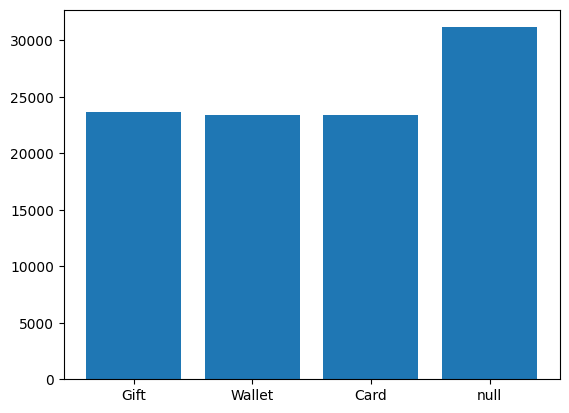

In [18]:
showRatio(df, 'payment_method')

Create new columns to store if payment is null, and filled the old one with 'ffill'

In [19]:
df_cat['null_payment'] = np.where(df['payment_method'].isnull, 1, 0)

df_cat['payment_method'].ffill(inplace = True)
df_cat

/tmp/ipykernel_57969/1873730839.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat['payment_method'].ffill(inplace = True)


,region,platform,device_type,payment_method,language,account_status,player_type_tag,engagement_level,loyalty_tier,skill_tier,null_payment
0,LATAM,PC,Phone,Wallet,DE,Active,Social,Low,Silver,NaN,1
1,NaN,Console,Desktop,Card,ES,Dormant,Collector,Low,Platinum,Gold,1
2,NaN,PC,Laptop,Card,EN,Dormant,Casual,High,Diamond,Gold,1
3,NaN,Console,Tablet,Card,ES,Dormant,Competitive,Veteran,Silver,Gold,1
4,NaN,PC,Tablet,Gift,EN,Active,Casual,Mid,Silver,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
101653,APAC,Console,Tablet,Card,KR,Active,Social,High,Bronze,Bronze,1
101654,EU,Console,Phone,Card,DE,NaN,Casual,Low,NaN,Diamond,1
101655,LATAM,Console,Tablet,Gift,ES,NaN,Social,High,Silver,NaN,1
101656,LATAM,Console,Desktop,Card,ES,Active,Competitive,Mid,Gold,Bronze,1


In [20]:
df_cat['payment_method'].isnull().sum()

np.int64(0)

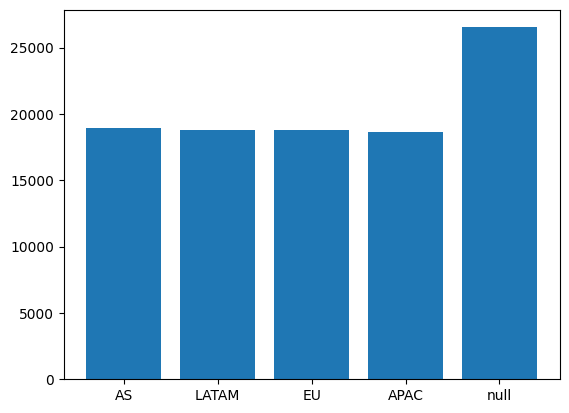

In [21]:
showRatio(df_cat, 'region')

In [22]:
df_cat['null_region'] = np.where(df['region'].isnull, 1, 0)

df_cat['region'].ffill(inplace = True)
df_cat

/tmp/ipykernel_57969/1438532610.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat['region'].ffill(inplace = True)


,region,platform,device_type,payment_method,language,account_status,player_type_tag,engagement_level,loyalty_tier,skill_tier,null_payment,null_region
0,LATAM,PC,Phone,Wallet,DE,Active,Social,Low,Silver,NaN,1,1
1,LATAM,Console,Desktop,Card,ES,Dormant,Collector,Low,Platinum,Gold,1,1
2,LATAM,PC,Laptop,Card,EN,Dormant,Casual,High,Diamond,Gold,1,1
3,LATAM,Console,Tablet,Card,ES,Dormant,Competitive,Veteran,Silver,Gold,1,1
4,LATAM,PC,Tablet,Gift,EN,Active,Casual,Mid,Silver,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101653,APAC,Console,Tablet,Card,KR,Active,Social,High,Bronze,Bronze,1,1
101654,EU,Console,Phone,Card,DE,NaN,Casual,Low,NaN,Diamond,1,1
101655,LATAM,Console,Tablet,Gift,ES,NaN,Social,High,Silver,NaN,1,1
101656,LATAM,Console,Desktop,Card,ES,Active,Competitive,Mid,Gold,Bronze,1,1


At the moment we will assume that the data have normal distributed, and we will replace the null value for each remaining columns as the mode of it.

In [23]:
remain_cat = create_null_table(df_cat)

remain_cat

,Missing value counts,Missing value percentage
engagement_level,7962,7.8
player_type_tag,7920,7.8
language,7898,7.8
skill_tier,7862,7.7
device_type,7814,7.7
loyalty_tier,7737,7.6
account_status,7717,7.6
platform,7681,7.6


In [24]:
for i in remain_cat.index:
    df_cat.fillna({i: df_cat[i].mode()[0]}, inplace = True)

df_cat

,region,platform,device_type,payment_method,language,account_status,player_type_tag,engagement_level,loyalty_tier,skill_tier,null_payment,null_region
0,LATAM,PC,Phone,Wallet,DE,Active,Social,Low,Silver,Bronze,1,1
1,LATAM,Console,Desktop,Card,ES,Dormant,Collector,Low,Platinum,Gold,1,1
2,LATAM,PC,Laptop,Card,EN,Dormant,Casual,High,Diamond,Gold,1,1
3,LATAM,Console,Tablet,Card,ES,Dormant,Competitive,Veteran,Silver,Gold,1,1
4,LATAM,PC,Tablet,Gift,EN,Active,Casual,Mid,Silver,Bronze,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101653,APAC,Console,Tablet,Card,KR,Active,Social,High,Bronze,Bronze,1,1
101654,EU,Console,Phone,Card,DE,Active,Casual,Low,Silver,Diamond,1,1
101655,LATAM,Console,Tablet,Gift,ES,Active,Social,High,Silver,Bronze,1,1
101656,LATAM,Console,Desktop,Card,ES,Active,Competitive,Mid,Gold,Bronze,1,1


Check if their are still null value remain

In [25]:
create_null_table(df_cat)

,Missing value counts,Missing value percentage


Change data into binary

In [26]:
df_cat_bin = pd.get_dummies(df_cat, drop_first = False)
df_cat_bin.head()

,null_payment,null_region,region_APAC,region_AS,region_EU,region_LATAM,platform_Console,platform_Mobile,platform_PC,device_type_Desktop,...,loyalty_tier_Bronze,loyalty_tier_Diamond,loyalty_tier_Gold,loyalty_tier_Platinum,loyalty_tier_Silver,skill_tier_Bronze,skill_tier_Diamond,skill_tier_Gold,skill_tier_Platinum,skill_tier_Silver
0,1,1,False,False,False,True,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
1,1,1,False,False,False,True,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2,1,1,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
3,1,1,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,1,1,False,False,False,True,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False


# Step 2: Training Preparation

Step 2.1: Merge data

In [27]:
df_prep = pd.concat([df_num_filled, df_cat_bin], axis = 1)

df_prep.head()

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,loyalty_tier_Bronze,loyalty_tier_Diamond,loyalty_tier_Gold,loyalty_tier_Platinum,loyalty_tier_Silver,skill_tier_Bronze,skill_tier_Diamond,skill_tier_Gold,skill_tier_Platinum,skill_tier_Silver
0,5.495437,24.837349,2740.945124,60.000000,56.034052,58219.915660,434.038311,17.790970,58.0,47.791178,...,False,False,False,False,True,True,False,False,False,False
1,9.991089,88.376322,1643.677401,22.000000,75.036888,28966.163953,4233.532935,28.862134,276.0,52.789877,...,False,False,False,True,False,False,False,True,False,False
2,14.234225,101.712292,2828.479467,66.000000,40.142612,44478.823835,4849.491895,22.536406,71.0,58.267306,...,False,True,False,False,False,False,False,True,False,False
3,3.373683,191.975841,1915.082950,80.000000,0.127910,57074.116993,6863.516123,10.565666,105.0,67.274038,...,False,False,False,False,True,False,False,True,False,False
4,22.469353,28.042509,517.921948,54.708112,45.078460,33249.740245,4408.101247,11.226504,111.0,50.677100,...,False,False,False,False,True,True,False,False,False,False


In [28]:
df_prep.isnull().any()

play_frequency           False
avg_session_duration     False
total_playtime_hours     False
login_streak             False
days_since_last_login    False
                         ...  
skill_tier_Bronze        False
skill_tier_Diamond       False
skill_tier_Gold          False
skill_tier_Platinum      False
skill_tier_Silver        False
Length: 77, dtype: bool

Step 2.2: Split data

In [29]:
X = df_prep.drop(columns = 'segment')

X

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,loyalty_tier_Bronze,loyalty_tier_Diamond,loyalty_tier_Gold,loyalty_tier_Platinum,loyalty_tier_Silver,skill_tier_Bronze,skill_tier_Diamond,skill_tier_Gold,skill_tier_Platinum,skill_tier_Silver
0,5.495437,24.837349,2740.945124,60.000000,56.034052,58219.915660,434.038311,17.790970,58.0,47.791178,...,False,False,False,False,True,True,False,False,False,False
1,9.991089,88.376322,1643.677401,22.000000,75.036888,28966.163953,4233.532935,28.862134,276.0,52.789877,...,False,False,False,True,False,False,False,True,False,False
2,14.234225,101.712292,2828.479467,66.000000,40.142612,44478.823835,4849.491895,22.536406,71.0,58.267306,...,False,True,False,False,False,False,False,True,False,False
3,3.373683,191.975841,1915.082950,80.000000,0.127910,57074.116993,6863.516123,10.565666,105.0,67.274038,...,False,False,False,False,True,False,False,True,False,False
4,22.469353,28.042509,517.921948,54.708112,45.078460,33249.740245,4408.101247,11.226504,111.0,50.677100,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101653,17.189970,125.413304,4042.198275,47.000000,42.264454,30455.881472,5058.189653,9.852469,179.0,11.689707,...,True,False,False,False,False,True,False,False,False,False
101654,7.560260,120.962552,1799.108384,20.000000,27.647682,29782.184066,1516.687257,8.235531,52.0,5.000000,...,False,False,False,False,True,False,True,False,False,False
101655,11.765396,38.541917,1097.814242,25.000000,47.259330,39479.658717,3147.264423,9.703321,149.0,44.062523,...,False,False,False,False,True,True,False,False,False,False
101656,12.898003,64.701401,3563.506452,120.000000,6.810932,48523.945493,1596.091703,31.721567,193.0,59.351458,...,False,False,True,False,False,True,False,False,False,False


In [30]:
y = df_prep['segment']

y

0         0.0
1         2.0
2         3.0
3         3.0
4         1.0
         ... 
101653    1.0
101654    0.0
101655    2.0
101656    3.0
101657    3.0
Name: segment, Length: 101658, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Check the distribution

In [32]:
y_train.value_counts() / y_train.shape[0]

segment
0.0    0.393281
1.0    0.249736
2.0    0.201977
3.0    0.155006
Name: count, dtype: float64

In [33]:
y_test.value_counts() / y_test.shape[0]

segment
0.0    0.397403
1.0    0.250197
2.0    0.202784
3.0    0.149616
Name: count, dtype: float64

## Step 3: Modeling

In [ ]:
from catboost import CatBoostClassifier

In [41]:
import xgboost as xgb
learning_rate_range = np.arange(0.01, 1, 0.05)

test_XG = []
train_XG = []

for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(
                      eta = lr,
                      max_depth = 6,
                      n_estimators = 2000,
                      colsample_bytree = 0.8,
                      reg_alpha = 0.1,
                      reg_lambda = 1,
                      scale_pos_weight = 1,
                      gamma = 0.9
                      )
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))


/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [09:46:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [09:53:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [09:54:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/xgbo

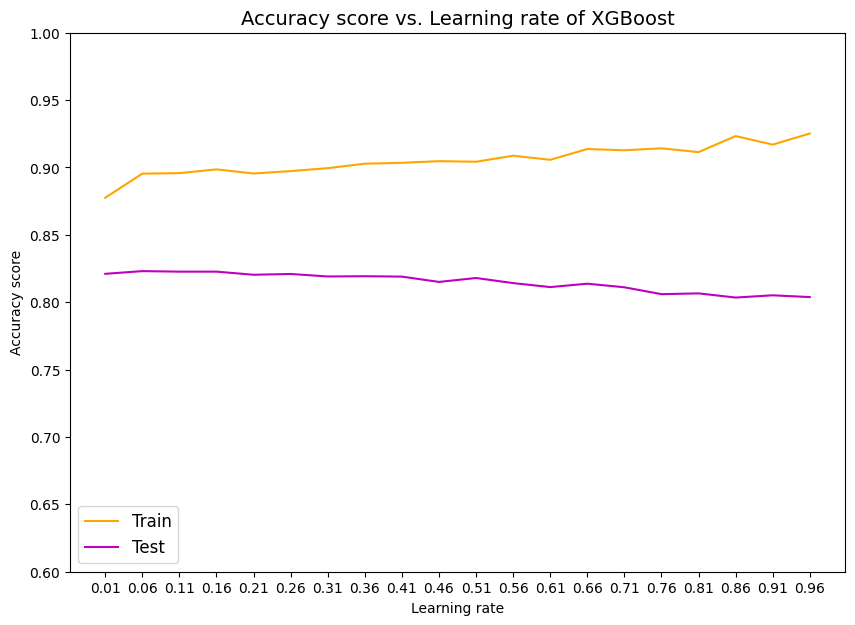

In [42]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

We can see that the elbow is at 0.1

In [ ]:
xgb_classifier = xgb.XGBClassifier(
                    eta = 0.1,
                    max_depth = 6,
                    n_estimators = 2000,
                    colsample_bytree = 0.8,
                    reg_alpha = 0.1,
                    reg_lambda = 1,
                    scale_pos_weight = 1,
                    gamma = 0.9
                    ).fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [38]:
import joblib

joblib.dump(xgb_classifier, 'model.pkl')

['model.pkl']

In [39]:
xgb_classifier = joblib.load("model.pkl")

## Step 5: Predict test value

In [40]:
df_test = pd.read_csv('test.csv')

df_test.isnull().sum()

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
df_test.drop(['id', 'player_id'], axis = 1, inplace = True)

In [ ]:
df_test['null_payment'] = [1.0 if i else 0.0 for i in df_test['payment_method'].isnull()]
df_test['null_region'] = [1.0 if i else 0.0 for i in df_test['region'].isnull()]


In [ ]:
df_test.fillna(df_test.mode(), inplace = True)

df_test

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,device_type,payment_method,language,account_status,player_type_tag,engagement_level,loyalty_tier,skill_tier,null_payment,null_region
0,4.917599,50.951821,1610.535142,3.0,40.047516,61031.190124,5403.618682,21.099955,107.0,35.339683,...,Tablet,Gift,EN,Active,Competitive,Mid,Diamond,Gold,1.0,1.0
1,8.060471,81.376671,543.088681,104.0,37.296412,10862.656232,100.199386,17.909547,NaN,76.929090,...,Laptop,Card,ES,Active,NaN,Mid,Silver,Bronze,0.0,0.0
2,1.004498,27.707037,721.533684,14.0,52.484579,27515.141077,1098.230071,26.183854,86.0,44.338151,...,Phone,Wallet,ES,Dormant,Collector,Low,Bronze,Platinum,0.0,1.0
3,27.002787,26.859972,1442.810933,62.0,43.851594,5299.499711,100.574936,3.228531,111.0,NaN,...,Phone,Wallet,ES,Dormant,Competitive,NaN,Bronze,Silver,0.0,0.0
4,6.188164,49.545383,2039.185739,8.0,15.519366,7491.446985,1645.853549,27.231039,148.0,57.614515,...,Desktop,Wallet,ES,Dormant,Competitive,Low,Silver,Platinum,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25884,8.775808,136.657801,NaN,104.0,27.716894,52024.435292,6542.959252,8.943746,15.0,56.538337,...,Desktop,Wallet,DE,Active,Competitive,Mid,Silver,Platinum,0.0,0.0
25885,14.578502,142.806569,1377.660175,112.0,42.323686,34027.337870,5003.671636,6.884182,247.0,32.336687,...,NaN,NaN,ES,NaN,Collector,Veteran,Silver,Gold,1.0,1.0
25886,7.211300,121.502257,3141.188491,43.0,19.584220,NaN,NaN,31.886739,42.0,51.340148,...,Tablet,NaN,ES,Dormant,Collector,High,NaN,Gold,1.0,1.0
25887,2.345938,46.367655,2647.562555,65.0,2.344132,50515.411004,3160.661119,11.481060,NaN,27.986010,...,Desktop,Wallet,DE,Dormant,Social,Low,Bronze,Diamond,0.0,1.0


In [ ]:
df_cat_bin = pd.get_dummies(df_test, drop_first = False)
df_cat_bin.head()

,play_frequency,avg_session_duration,total_playtime_hours,login_streak,days_since_last_login,total_spending_thb,avg_monthly_spending,spending_frequency,friend_count,team_play_percentage,...,loyalty_tier_Bronze,loyalty_tier_Diamond,loyalty_tier_Gold,loyalty_tier_Platinum,loyalty_tier_Silver,skill_tier_Bronze,skill_tier_Diamond,skill_tier_Gold,skill_tier_Platinum,skill_tier_Silver
0,4.917599,50.951821,1610.535142,3.0,40.047516,61031.190124,5403.618682,21.099955,107.0,35.339683,...,False,True,False,False,False,False,False,True,False,False
1,8.060471,81.376671,543.088681,104.0,37.296412,10862.656232,100.199386,17.909547,NaN,76.929090,...,False,False,False,False,True,True,False,False,False,False
2,1.004498,27.707037,721.533684,14.0,52.484579,27515.141077,1098.230071,26.183854,86.0,44.338151,...,True,False,False,False,False,False,False,False,True,False
3,27.002787,26.859972,1442.810933,62.0,43.851594,5299.499711,100.574936,3.228531,111.0,NaN,...,True,False,False,False,False,False,False,False,False,True
4,6.188164,49.545383,2039.185739,8.0,15.519366,7491.446985,1645.853549,27.231039,148.0,57.614515,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
y_pred = xgb_classifier.predict(df_cat_bin)

y_pred

array([2, 0, 0, ..., 3, 0, 3])

In [ ]:
save_y = pd.DataFrame(y_pred)

save_y.to_csv("predicted.csv")